# Epsilon Greedy in K-armed Bandit Problem

In [1]:
# !pip install matplotlib
# !pip install numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Initialization

In [3]:
NUM_TRIALS = 2000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

# Bandit Model

In [4]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 3.
        self.N = 1.
    
    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N

In [48]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([bandit.p for bandit in bandits])
    print("Optimal j:", optimal_j)
    
    for i in range(NUM_TRIALS):
        j = np.argmax([b.p_estimate for b in bandits])
        x = bandits[j].pull()
        
        # update rewards log
        rewards[i] = x
        
        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
        
        
    for b in bandits:
        print("mean estimate:", b.p_estimate)
    
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum()/NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num times selected each bandit:", [b.N for b in bandits])
    
    # plot
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()
            

Optimal j: 2
mean estimate: 0.6666666666666666
mean estimate: 0.6666666666666666
mean estimate: 0.7664490205926673
total reward earned: 1525.0
overall win rate: 0.7625
num_times_explored: 0
num times selected each bandit: [6.0, 6.0, 1991.0]


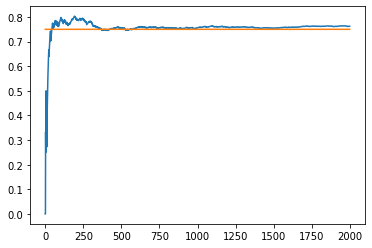

In [49]:
experiment()

# Resault

<ul><li>The Final Resault is better than Epsilon Greedy.</li>
<li>The best option is further selected and the other two options are selected a total of 12 times. Therefore, the model did not search a part of the model well.</li>
</ul>